In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("seaborn-darkgrid")

In [ ]:
print(plt.style.available)

In [2]:
df = pd.read_csv("/home/max/Dokumente/Skripts/fridays_code_base/data/TAG_Schnee_StPoelten.csv")

In [3]:
df["date"] = pd.to_datetime(df["time"].astype("datetime64"),
                            format = "%Y-%m-%d")


In [4]:
df["is_snow"] = np.where(df["schnee"] > 0.1, 1, 0)

In [5]:
df.set_index("date", drop = False, inplace = True)

In [6]:
df_sum = df[["is_snow", "date"]]

In [7]:
df_sum["year"] = df_sum["date"].dt.year

/tmp/ipykernel_36975/443227131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum["year"] = df_sum["date"].dt.year


In [8]:
summiert = df_sum.groupby(pd.Grouper(key = "date", axis = 0, freq = "5Y")).sum()
summiert = summiert[["is_snow"]][1:]

In [9]:
summiert = df_sum.groupby((df_sum.index.year//10)*10).sum()

In [10]:
summiert["Schneetage/Jahr"] = summiert["is_snow"]/10

In [11]:
summiert["Schneetage/Jahr"][2020] = summiert["is_snow"][2020]/3

/tmp/ipykernel_36975/2836818351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summiert["Schneetage/Jahr"][2020] = summiert["is_snow"][2020]/3


In [16]:
summiert["Jahre"] = ["vor 1950","1950-1959","1960-1969","1970-1979","1980-1989","1990-1999","2000-2009","2010-2019","2020-2022"]
summiert.set_index("Jahre", drop = True, inplace = True)

<IPython.core.display.Javascript object>


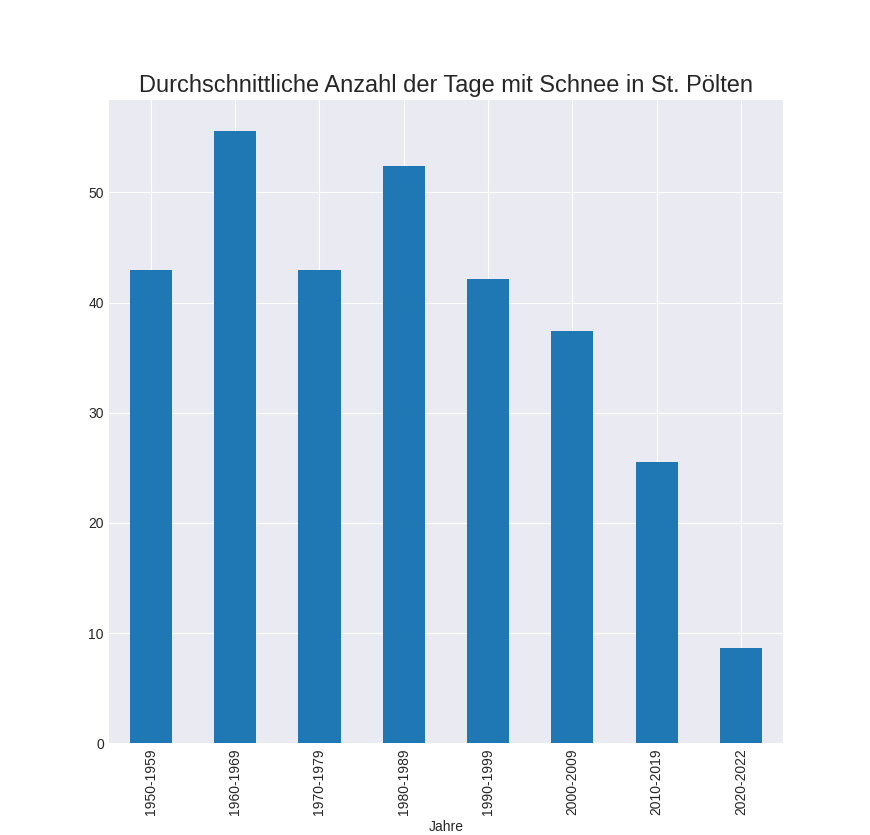

Text(0.5, 1.0, 'Durchschnittliche Anzahl der Tage mit Schnee in St. Pölten')

In [26]:
summiert["Schneetage/Jahr"][1:].plot.bar()
plt.title("Durchschnittliche Anzahl der Tage mit Schnee in St. Pölten", fontsize=17)

In [ ]:
df.groupby(pd.Grouper(key=index, axis = 0, freq="10Y")).sum()

In [19]:
summiert_20a = df_sum.groupby(pd.Grouper(key = "date", axis = 0, freq = "20Y")).sum()

<IPython.core.display.Javascript object>


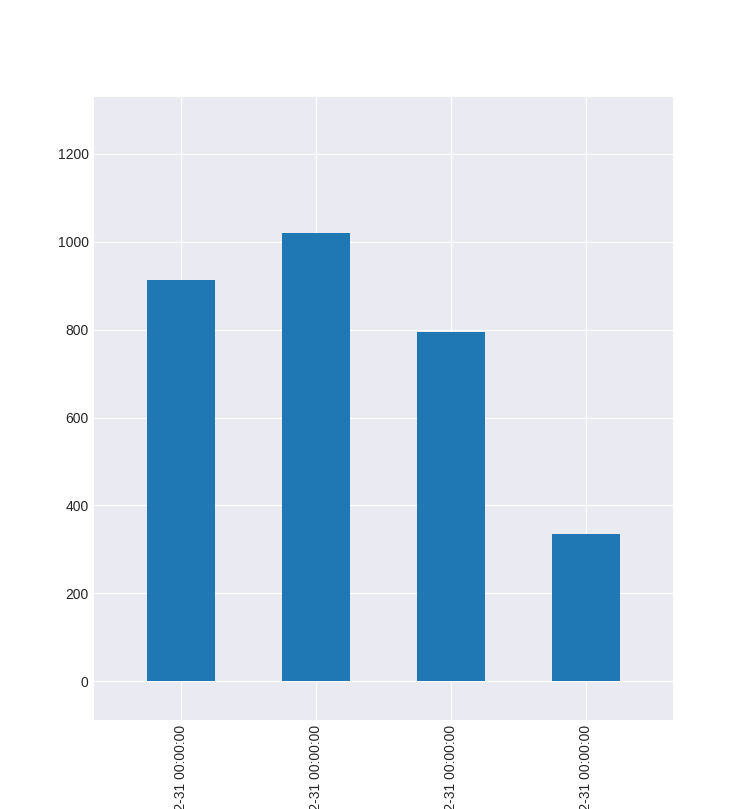

<AxesSubplot:xlabel='date'>

In [23]:
summiert_20a["is_snow"][1:].plot.bar()